In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
import yfinance as yf

In [5]:
start= '2012-01-01'
end= '2025-08-22'
stock= 'INFOBEAN.NS'
data=yf.download(stock,start,end)

/tmp/ipykernel_2780/642626142.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [6]:
data.reset_index(inplace=True)

In [7]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,INFOBEAN.NS,INFOBEAN.NS,INFOBEAN.NS,INFOBEAN.NS,INFOBEAN.NS
0,2017-07-24,63.731403,66.127321,63.252220,63.731403,42000
1,2017-07-25,64.210587,64.689770,63.731403,64.258508,62000
2,2017-07-26,64.210587,64.306422,63.252220,64.306422,12000
3,2017-07-27,62.868877,63.731409,62.773042,63.731409,6000
4,2017-07-28,62.533443,62.533443,62.485522,62.485522,8000
...,...,...,...,...,...,...
1992,2025-08-14,627.000000,669.049988,616.000000,656.500000,283052
1993,2025-08-18,641.200012,648.299988,619.000000,634.950012,73409
1994,2025-08-19,655.400024,668.000000,637.500000,645.000000,127519


In [8]:
 ma_100_days=data.Close.rolling(100).mean()

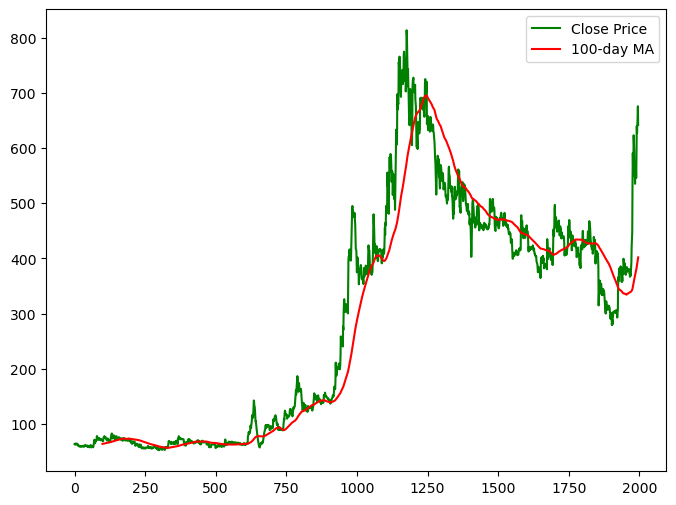

In [9]:
plt.figure(figsize=(8,6))
plt.plot(data['Close'], 'g', label="Close Price")
plt.plot(ma_100_days, 'r', label="100-day MA")
plt.legend()
plt.show()


In [10]:
 ma_200_days=data.Close.rolling(200).mean()

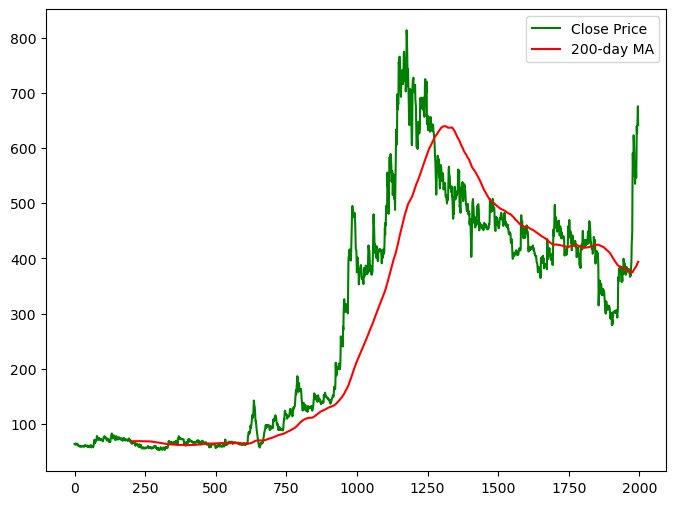

In [11]:
plt.figure(figsize=(8,6))
plt.plot(data['Close'], 'g', label="Close Price")
plt.plot(ma_200_days, 'r', label="200-day MA")
plt.legend()
plt.show()


In [12]:
data.dropna(inplace=True)

In [13]:
# Split data into train and test
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test  = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])


In [14]:
data_train.shape[0]

1597

In [15]:
data_test.shape[0]

400

In [16]:
from sklearn.preprocessing import MinMaxScaler  




In [17]:
# Initialize scaler to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))


In [18]:
# Fit on training data and transform
data_train_scale = scaler.fit_transform(data_train)


In [19]:
x=[]
y=[]
for i in range (100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [20]:
x,y=np.array(x),np.array(y)


In [21]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


2025-08-24 09:43:25.594610: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-24 09:43:25.682586: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-24 09:43:28.341523: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [22]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [23]:

model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True, activation='relu', input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=60, return_sequences=True, activation='relu'))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(units=80, return_sequences=True, activation='relu'))
model.add(Dropout(0.4))

# Fourth LSTM layer (final, no return_sequences)
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')


2025-08-24 09:43:32.403288: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/f5d62ed8-455d-4767-b5d4-e4ad44363999/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - loss: 0.0410
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - loss: 0.0078
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - loss: 0.0064
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 285ms/step - loss: 0.0067
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - loss: 0.0073
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 0.0054
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - loss: 0.0060
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - loss: 0.0051
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - loss: 0.0056
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - loss: 0.0052
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - loss: 0.0049
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - loss: 0.0050
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - loss: 0.0049
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - loss: 0.0046
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step 

In [ ]:
model.summary()

In [ ]:
pas_100_days= data_train.tail(100)

In [ ]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [ ]:
data_test_scale= scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])

# Convert lists to numpy arrays after the loop
x, y = np.array(x), np.array(y)


In [ ]:
y_predict=model.predict(x)

In [ ]:
y_predict

In [ ]:
scale=1/scaler.scale_

In [ ]:
y_predict=y_predict*scale

In [ ]:
y=y*scale

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted_Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
         

In [ ]:
model.save('Stock Prediction Model.keras') 